# 作业1：Numpy练习

本次作业主要对Python中的矩阵运算库Numpy进行练习。如遇到不清楚的函数或主题，可以查阅[官方文档](https://numpy.org/doc/stable/user/index.html)或利用搜索引擎寻求帮助。

### 基础知识

本节对Numpy进行简要介绍，没有实际的题目，可直接运行每一个单元格。

首先导入Numpy包：

In [2]:
import numpy as np

利用Numpy可以方便地创建向量和矩阵：

In [2]:
vec = np.array([1.0, 2.0, 5.0])
print(vec)

[1. 2. 5.]


In [2]:
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[[1.  2.  2. ]
 [3.  5.  4.5]]


In [3]:
vec = np.linspace(start=1.0, stop=5.0, num=12)
print(vec)

[1.         1.36363636 1.72727273 2.09090909 2.45454545 2.81818182
 3.18181818 3.54545455 3.90909091 4.27272727 4.63636364 5.        ]


In [4]:
mat = np.reshape(vec, (3, 4))
print(mat)

[[1.         1.36363636 1.72727273 2.09090909]
 [2.45454545 2.81818182 3.18181818 3.54545455]
 [3.90909091 4.27272727 4.63636364 5.        ]]


Python中下标是从0开始的，请一定要记住这一点，否则会造成很多逻辑错误。

In [5]:
print(vec[0])
print(vec[2])
print(mat[1, 1])

1.0
1.7272727272727273
2.8181818181818183


负数的下标表示从尾部往前数：

In [6]:
print(vec[-1])
print(vec[-2])
print(mat[1, -1])

5.0
4.636363636363637
3.5454545454545454


可以用冒号选取向量中的一段范围，格式为`x[start:end]`，选出的元素包含`x[start]`，不包含`x[end]`。

In [7]:
print(vec[1:3])

[1.36363636 1.72727273]


In [8]:
print(mat[:, :2])

[[1.         1.36363636]
 [2.45454545 2.81818182]
 [3.90909091 4.27272727]]


在编写函数时，经常需要各种测试数据，此时可以用Numpy来生成各类随机数。在需要用到随机数之前，一定要先设置随机数种子，以使结果可重复。

In [11]:
np.random.seed(123)

生成均匀分布随机数：

In [6]:
unif = np.random.uniform(low=0.0, high=1.0, size=5)
print(unif)

[0.67102025 0.07250743 0.33653079 0.97804768 0.72366692]


正态分布随机数：

In [3]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.28665389  0.67593124 -0.29266218 -2.21171843  0.55726428]
 [ 0.25812511  0.12650989 -1.79662023 -1.68616067  0.45080929]]


Numpy提供了许多数学函数对向量和矩阵进行操作：

In [4]:
print(np.exp(norm))

[[1.33196313 1.96586281 0.74627421 0.1095123  1.7458897 ]
 [1.29450076 1.13486068 0.16585851 0.18522932 1.56958192]]


In [7]:
print(np.log(unif))

[-0.39895596 -2.62406624 -1.08906564 -0.02219686 -0.32342405]


也可以对向量和矩阵进行汇总：

In [8]:
np.sum(unif)

2.7817730621038637

In [9]:
np.mean(norm)

-0.3631867799926281

汇总可以按行或者按列进行，这由`axis`参数决定。0表示运算时第一个维度（行）在变化，1表示运算时第二个维度（列）在变化。
再次提醒，Python中以0表示第一个元素！

In [10]:
np.mean(norm, axis=0)  # 对第一个维度（行标在变化）求均值

array([ 0.2723895 ,  0.40122057, -1.0446412 , -1.94893955,  0.50403679])

In [11]:
np.var(norm, axis=1)  # 对第二个维度（列标在变化）求方差

array([1.12661724, 0.99103324])

### 第1题

(a) 生成10000个服从(0, 1)间均匀分布的随机数，赋值给变量`x`，并打印其**前10个**元素。

In [32]:
x=np.random.uniform(0,1,10000)
print(x[0:10])

[0.91213467 0.88727196 0.21700605 0.4827855  0.100009   0.42139223
 0.31955712 0.14990481 0.83532394 0.93680065]


(b) 创建向量`y`，令其在数学上等于`y=-log(x)`，其中`log`为自然对数。打印`y`的**最后10个**元素。

In [33]:
y=-np.log(x)
print(y[-11:-1])

[0.45905191 0.48930452 1.88436476 1.37813581 1.19574275 0.19315083
 1.03659768 0.32663234 0.22166171 0.18655511]


(c) 查找在Python中绘制图形的方法，绘制`y`的直方图。

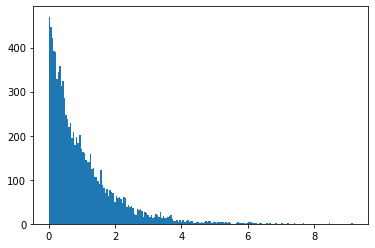

In [37]:
import matplotlib.pyplot as plt
plt.hist(y, 200)  
plt.show()

(d) 猜测或证明`y`服从什么分布，并简要说明理由。

In [39]:
#y服从指数分布 x服从均匀分布，y=-log(x)，可以得出y的概率密度函数为1-exp(-y),则y服从参数为1的指数分布

### 第2题

(a) 考虑Sigmoid函数 $$\sigma(x)=\frac{e^x}{1+e^x}$$

请在Python中编写一个函数`sigmoid(x)`，令其可以接收一个向量`x`，返回Sigmoid函数在`x`上的取值。

In [42]:
def sigmoid(x):
    sigma=np.exp(x)/(1+np.exp(x))
    return sigma
print(sigmoid(5))

0.9933071490757152


(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [43]:
x=np.array([-1000,-100,-10,0,10,100,1000])
print(sigmoid(x))
#出现警告：指数函数溢出

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00            nan]


<ipython-input-42-02e377e4db87>:2: RuntimeWarning: overflow encountered in exp
  sigma=np.exp(x)/(1+np.exp(x))
<ipython-input-42-02e377e4db87>:2: RuntimeWarning: invalid value encountered in true_divide
  sigma=np.exp(x)/(1+np.exp(x))


(c) 如果出现警告或错误，思考可能的原因是什么。（提示：Sigmoid函数真实的取值范围是多少？分子和分母的取值范围又是什么？是否可以对Sigmoid函数的表达式进行某种等价变换？）如果一切正常，可忽略此问题。

In [46]:
#sigmoid函数，单调增，定义域是(−∞ ,+∞ )，值域是(0,1)
#Sigmoid函数中有exp(x),当x取值很大时，就会存在溢出的风险


[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00 1.00000000e+00]


(d) 请再次尝试编写`sigmoid(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [47]:
def sigmoid(x):
    y=[]
    for i in range(len(x)):
        if x[i] >= 0:
            y.append(1 / (1 + np.exp(-x[i])))
        else:
            y.append(np.exp(x[i]) / (1+ np.exp(x[i])))
    return np.array(y)
print(sigmoid(x))

#参考来源：https://www.pythonheidong.com/blog/article/409614/7621b818f7f6a911cca0/

[0.00000000e+00 3.72007598e-44 4.53978687e-05 5.00000000e-01
 9.99954602e-01 1.00000000e+00 1.00000000e+00]


### 第3题

(a) 考虑Softplus函数 $$\mathrm{softplus}(x)=\log(1+e^x)$$

请在Python中编写一个函数`softplus(x)`，令其可以接收一个向量`x`，返回Softplus函数在`x`上的取值。

In [50]:
def Softplus(x):
    sp=np.log(1 + np.exp(x))
    return sp
print(Softplus(3))

3.048587351573742


(b) 创建向量`x`，使其包含元素-1000, -100, -10, 0, 10, 100, 1000。在`x`上调用上面编写的函数，返回的结果是什么？是否出现警告或错误？

In [51]:
x=np.array([-1000,-100,-10,0,10,100,1000])
print(Softplus(x))

[0.00000000e+00 0.00000000e+00 4.53988992e-05 6.93147181e-01
 1.00000454e+01 1.00000000e+02            inf]


<ipython-input-50-ef7397087572>:2: RuntimeWarning: overflow encountered in exp
  sp=np.log(1 + np.exp(x))


(c) 如果出现警告或错误，参照第2题的方法，思考可能的原因是什么。如果一切正常，可忽略此问题。

In [67]:
#Softplus函数中有exp(x),当x取值很大时，就会存在溢出的风险

(d) 请再次尝试编写`softplus(x)`函数，使其在给定的数据上顺利计算结果。可在网上搜索相关主题寻求帮助，但需给出来源。如果之前一切正常，可忽略此问题。

In [66]:
def Softplus(x):
    y=[]
    for i in range(len(x)):
        if x[i] >= 0:
            y.append(np.log(1 + np.exp(-x[i])) + x[i])
        else:
            y.append(np.log(1 + np.exp(x[i])))
    return np.array(y)
print(Softplus(x))

[0.00000000e+00 0.00000000e+00 4.53988992e-05 6.93147181e-01
 1.00000454e+01 1.00000000e+02 1.00000000e+03]
